In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
X_test = pd.read_csv('../data/X_test.csv')
X_train = pd.read_csv('../data/X_train.csv')
y_test = pd.read_csv('../data/y_test.csv')
y_train = pd.read_csv('../data/y_train.csv')

In [3]:
# Convert to numpy 1d-array
y_test = y_test.to_numpy().flatten()
y_train = y_train.to_numpy().flatten()

## Model 1

### Logistic Regression

In [4]:
ss = StandardScaler(with_mean = True, with_std = False)
lr = LogisticRegression(C=10, max_iter=1000, penalty='l2', solver ='lbfgs')   


In [5]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [6]:
# Get predictions
preds = lr.predict(X_test)

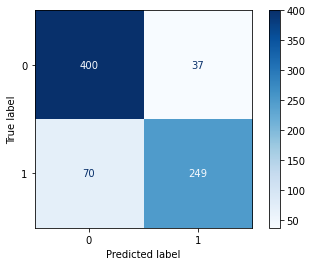

In [7]:
# View confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', values_format='d');


In [8]:
# Calculate the specificity
tn / (tn + fp)


0.9153318077803204

In [9]:
# Predicted Probabilities
pred_proba = lr.predict_proba(X_test)[:,1]

In [10]:
def metrics(y_test, y_predict, pred_proba):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Unpopular Opinion', 'Change My View'], 
                            columns=['Predicted Unpopular Opinion', 'Predicted Change My View']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')
    print('ROC_AUC SCORE %s ' %roc_auc_score(y_test, pred_proba))
    

In [11]:
metrics(y_test, preds, pred_proba)


Accuracy score 0.8584656084656085  

----------------------------------------------------------------
                   Predicted Unpopular Opinion  Predicted Change My View
Unpopular Opinion                          400                        37
Change My View                              70                       249 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       437
           1       0.87      0.78      0.82       319

    accuracy                           0.86       756
   macro avg       0.86      0.85      0.85       756
weighted avg       0.86      0.86      0.86       756

-----------------------------------------------------------------
ROC_AUC SCORE 0.9350372660559672 


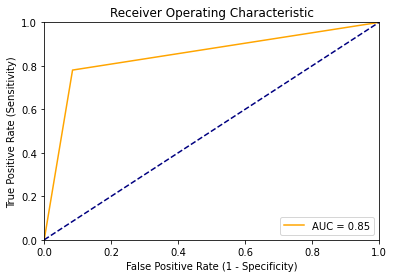

In [12]:
#ROC/AUC Curve
from sklearn import metrics
pred_proba
preds 
fp, tp, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fp, tp)


plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc, color = 'orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'navy')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()

## Model 2

### RandomForests

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features =None)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=None)

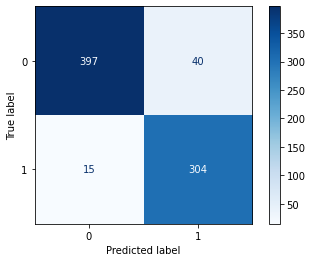

In [14]:
# Get predictions
preds = rf.predict(X_test)

# View confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', values_format='d');

In [15]:
# Calculate the specificity
tn / (tn + fp)

0.9084668192219679

In [16]:
# Predicted Probabilities
pred_proba = rf.predict_proba(X_test)[:,1]

In [17]:
def metrics(y_test, y_predict, pred_proba):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Unpopular Opinion', 'Change My View'], 
                            columns=['Predicted Unpopular Opinion', 'Predicted Change My View']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')
    print('ROC_AUC SCORE %s ' %roc_auc_score(y_test, pred_proba))

In [18]:
metrics(y_test, preds, pred_proba)

Accuracy score 0.9272486772486772  

----------------------------------------------------------------
                   Predicted Unpopular Opinion  Predicted Change My View
Unpopular Opinion                          397                        40
Change My View                              15                       304 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       437
           1       0.88      0.95      0.92       319

    accuracy                           0.93       756
   macro avg       0.92      0.93      0.93       756
weighted avg       0.93      0.93      0.93       756

-----------------------------------------------------------------
ROC_AUC SCORE 0.9694339433154237 


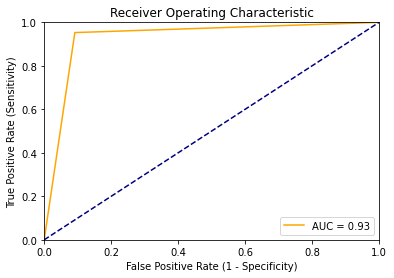

In [19]:
#ROC/AUC Curve
from sklearn import metrics
pred_proba
preds 
fp, tp, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fp, tp)


plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc, color = 'orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'navy')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()